<a href="https://colab.research.google.com/github/cuie23/learning-pytorch/blob/main/Torch_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn  # Torch neural net package
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
torch.__version__

'2.5.1+cu121'

## Frequently used stuff
* torch.nn
  * building blocks for graphs
* torch.nn.Parameter: which  
  * parameters from which the model will try and learn
* torch.nn.Module
  * base class for all NN modules
  * need to override forward()
* torch.optim
  * gradient descent optimizers
* torch.utils.data.Dataset, torch.utils.data.DataLoader
  * load data

In [ ]:
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

## Preparing/Loading Data
- Create sample linear data with known params
- $y=ax+b+\varepsilon$

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step = step).unsqueeze(dim = 1)
y = weight * X + bias

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Create Model
- Linear Regression

In [ ]:
class LinearRegression(nn.Module): # inherit from nn.Module, subclass
  def __init__(self):
    super().__init__()

    # initialize model parameters
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype = torch.float))

  # function used in the forward pass of the NN
  def forward(self, x : torch.tensor) -> torch.Tensor:
    return self.weights * x + self.bias    # linear regression formula


In [ ]:
torch.manual_seed(42) # initialize with random values

model = LinearRegression()
print(model.state_dict()) # model will try to adjust weight, bias to fit data

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [ ]:
# train
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01)

torch.manual_seed(42)

epochs = 5000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  model.train()                     # 1. put model in training mode
  y_pred = model(X_train)           # 2. forward pass
  loss = loss_fn(y_pred, y_train)   # 3. get loss
  optimizer.zero_grad()             # 4. zero optimizer
  loss.backward()                   # 5. backpropogation (calculate gradients)
  optimizer.step()                  # 6. step along gradient


  model.eval()                      # evaluation mode
  with torch.inference_mode():
    test_pred = model(X_test)       # forward pass on test data
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    if (epoch % 50 == 0):           # store every 10th epoch
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())   # detach is pulling value out of
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.00020449477597139776 | MAE Test Loss: 0.00021643417130690068 
Epoch: 50 | MAE Train Loss: 0.0001792821567505598 | MAE Test Loss: 0.0001897496113087982 
Epoch: 100 | MAE Train Loss: 0.00015717861242592335 | MAE Test Loss: 0.0001663553703110665 
Epoch: 150 | MAE Train Loss: 0.00013779998698737472 | MAE Test Loss: 0.00014584574091713876 
Epoch: 200 | MAE Train Loss: 0.00012081013119313866 | MAE Test Loss: 0.0001278639247175306 
Epoch: 250 | MAE Train Loss: 0.00010591498721623793 | MAE Test Loss: 0.00011209950025659055 
Epoch: 300 | MAE Train Loss: 9.285806299885735e-05 | MAE Test Loss: 9.827956091612577e-05 
Epoch: 350 | MAE Train Loss: 8.140889985952526e-05 | MAE Test Loss: 8.616068953415379e-05 
Epoch: 400 | MAE Train Loss: 7.137165812309831e-05 | MAE Test Loss: 7.553854084108025e-05 
Epoch: 450 | MAE Train Loss: 6.25722313998267e-05 | MAE Test Loss: 6.622540968237445e-05 
Epoch: 500 | MAE Train Loss: 5.485775909619406e-05 | MAE Test Loss: 5.8060606534127146

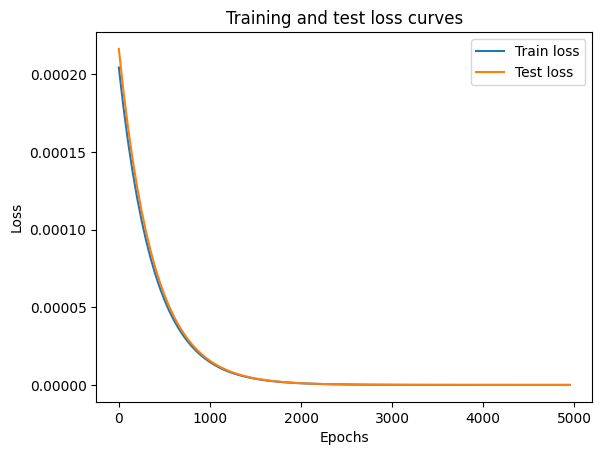

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
print(model.state_dict())  # end params


OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.3000]))])


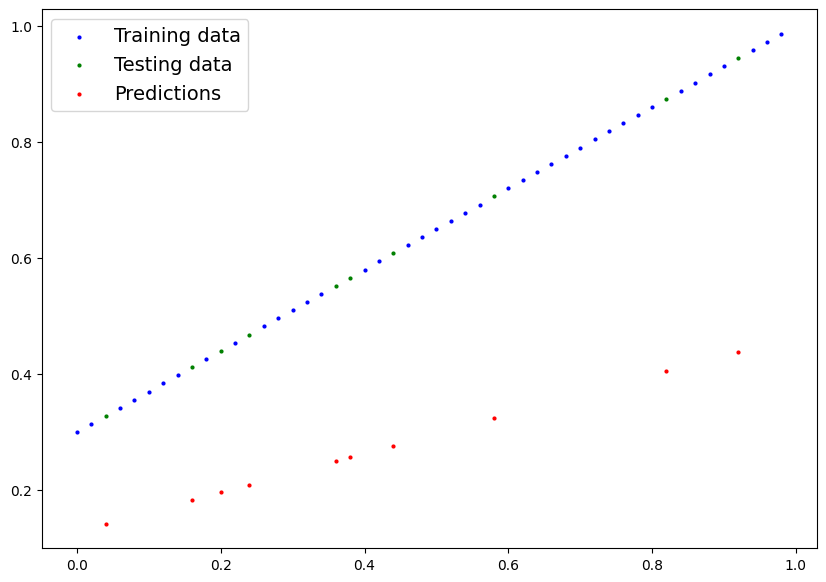

In [ ]:
# make predictions
with torch.inference_mode():
  y_preds = model(X_test)

plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = y_preds)